# Plotting and Data Visualization

```{admonition} Overview
:class: overview

Questions:

* How do I visualize data by making graphs?

Objectives:

* Plot data from a 'pandas dataframe'.

* Label and customize graph.

* Save figures to files.

* Plot multiple graphs on one figure.

* Create multiple figures using a 'for' loop
```

Plotting is one of the most effective methods of representing numerical data and illustrating their patterns and trends.  There are a number of applications that facilitate graph creation (Excel, Origin, SciDavis, etc.), but these methods can be time consuming, tedious, and at times inflexible.  We have already seen the potential of coding for reading/editing/saving multiple files at once, as well as in creating tables from raw data in a 'CSV' file.  Taking what we have learned so far, we will focus in this module on creating plots from the data in the previous lesson, customizing the plots with color, design, labels and legends, and using loops to create multiple figures at once.

### Prepare data for plotting

First, we need to import pandas and load our data into variables.  These lines should look familiar from the previous lesson.


In [1]:
import pandas as pd

distance_file = "data/distance_data_headers.csv"

distances = pd.read_csv(distance_file)

distances

,Frame,THR4_ATP,THR4_ASP,TYR6_ATP,TYR6_ASP
0,1,8.9542,5.8024,11.5478,9.9557
1,2,8.6181,6.0942,13.9594,11.6945
2,3,9.0066,6.0637,13.0924,11.3043
3,4,9.2002,6.0227,14.5282,10.1763
4,5,9.1294,5.9365,13.5321,10.6279
...,...,...,...,...,...
9995,9996,8.5083,7.7587,9.1789,10.6715
9996,9997,8.9524,7.4681,9.5132,10.9945
9997,9998,8.6625,7.7306,9.5469,10.3063
9998,9999,9.2456,7.8886,9.8151,10.7564


## Plotting Data

A data set is plotted using the 'plot()' function of matplotlib.pyplot.  By using the pandas DataFrame object for our tabular data, we can refer to the desired column by its header name.  If you want to see how this simplifies working with our data, check out the "Prepare for Plotting section" at the top of the [original lesson](https://education.molssi.org/python_scripting_cms/05-plotting/index.html) from which this one was adapted.

In [2]:
import matplotlib.pyplot as plt

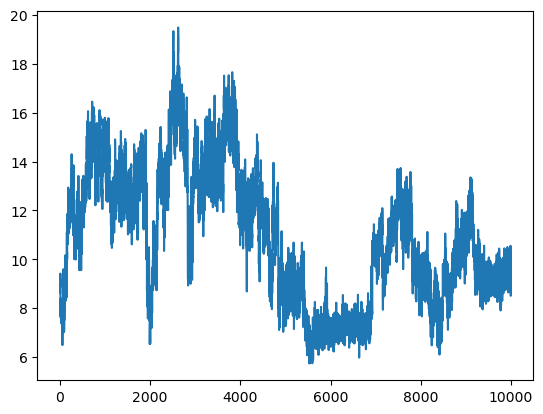

In [3]:
plt.figure()     #This initializes a new figure
plt.plot(distances["THR4_ATP"])

``````{admonition} Check Your Understanding
:class: exercise

How would you get make the same plot using the iloc command? 

````{admonition} Solution
:class: solution dropdown

```python
# THR4_ATP is the second column, and we want all rows
plt.figure()
plt.plot(distances.iloc[:,1])
```
````
``````

### Plotting with x and y

The data here are relatively straightforward, with the Frame column serving as a simple x value for the rest of the columns.  Often however, it is necessary to show trends or patterns in data in relation to a variety of independent variables.  If you have data that contains multiple x columns, it can be helpful to specify the x and y values we wish to use.  In with 'pyplot', the first two parameters in the 'plot()' function are 'x' and 'y' by default.

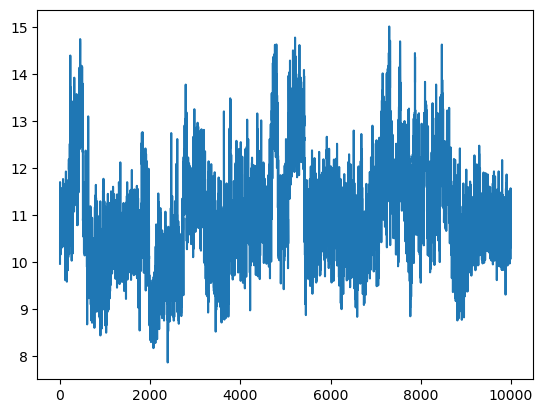

In [4]:
plt.figure()
plt.plot(distances["Frame"], distances["TYR6_ASP"])

'x' and 'y' must also be specified if we wanted to plot the data non-sequentially, say at regular intervals.  To do this we will use a new slicing syntax. To select frames at regular intervals, we can use the syntax 'array[start:stop:interval]'.

#### Slicing at regular intervals

Let's start with viewing this slice in a table

In [5]:
print(distances.iloc[0:1000:100,1:])    # to use the whole data set, simply leave out the stopping point integer, as before

     THR4_ATP  THR4_ASP  TYR6_ATP  TYR6_ASP
0      8.9542    5.8024   11.5478    9.9557
100    9.0139    5.7436   13.9145   10.7853
200   11.5060    8.9265   15.2785   12.0995
300   13.2053    7.6506   15.8632   12.0482
400   10.8274    7.6897   14.1698   12.2827
500   13.0953    7.6354   15.6024   12.5670
600   15.1074    5.9674   14.8006    9.6562
700   14.6342    6.2847   14.4311    9.7521
800   14.0266    7.6997   12.9560    9.7198
900   15.0463    6.7667   13.9174    9.3867


Here is our new figure:

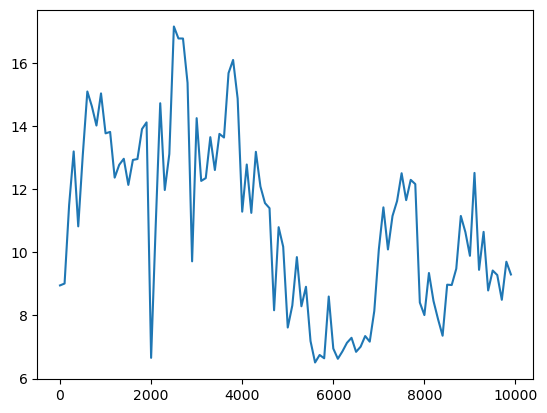

In [6]:
plt.figure()
plt.plot(distances.iloc[::100,0], distances.iloc[::100,1])

### Labels and Legends

To add labels and legends, add them to the initialized figure using 'functions' belonging to 'pyplot'.  We can use variables to create them, which will also save us time later on.

```{admonition} Saving precious keystrokes
:class: tip

The data labels in our set are all caps mixed with numbers and an underscore.  They are going to be cumbersome to reference, so we'll assign them to a variable for later before moving on.
```

In [7]:
top = distances.columns    # Creates a list of column headers
for i in top:    # loop through headers and print them one by one
    print(i)

Frame
THR4_ATP
THR4_ASP
TYR6_ATP
TYR6_ASP


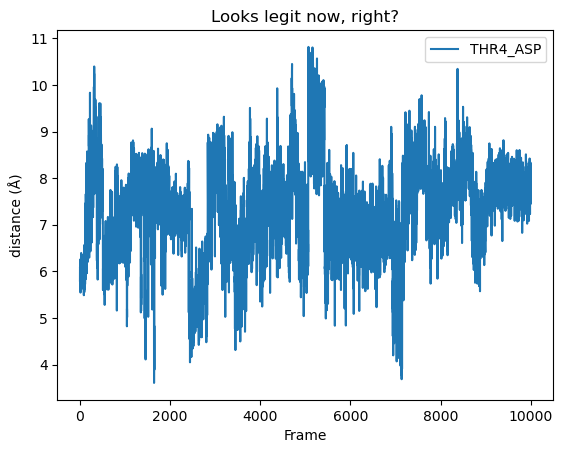

In [8]:
plt.figure()
plt.xlabel('Frame')
plt.ylabel('distance (\u212B)')    # Gettin' fancy with unicode characters
plt.title('Looks legit now, right?')
# Now we can reference the columns with our new list of headers
fig_1 = plt.plot(distances[top[0]], distances[top[2]], label=top[2])
plt.legend()

### Different kinds of charts

There are a variety of short strings that can be passed to the plot funtion convert the default line graph into a dashed line, scatter plot with various markers etc.

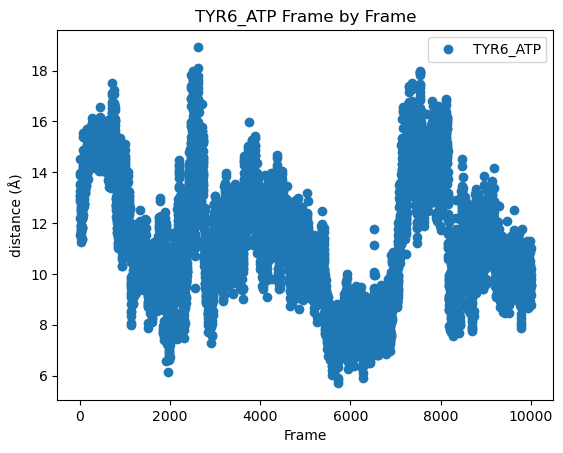

In [9]:
plt.figure()
plt.xlabel('Frame')
plt.ylabel('distance (\u212B)')    # Gettin' fancy with unicode characters
plt.title(f'{top[3]} Frame by Frame')
fig_2 = plt.plot(distances[top[0]], distances[top[3]], 'o', label=top[3])
plt.legend()

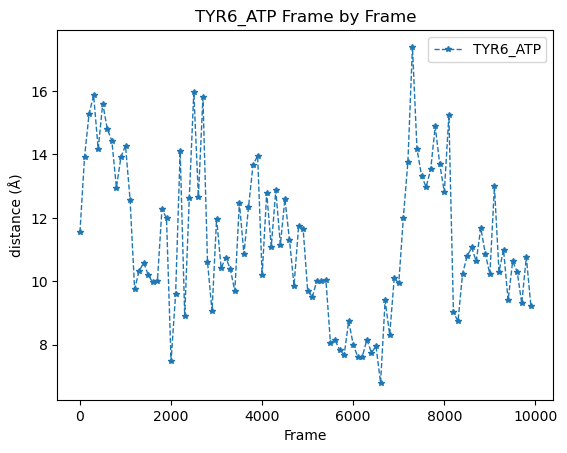

In [10]:
plt.figure()
plt.xlabel('Frame')
plt.ylabel('distance (\u212B)')    # Gettin' fancy with unicode characters
plt.title(f'{top[3]} Frame by Frame')
# a cleaner plot by taking intervals, changing the markers, adding a dashed line between them, and adjusting sizes
fig_3 = plt.plot(distances.iloc[::100,0], distances.iloc[::100,3], '--*', markersize=4, linewidth=1, label=top[3])
plt.legend()

Here is a list of options you can use.

> character	description
> '-'	solid line style
> '--'	dashed line style
> '-.'	dash-dot line style
> ':'	dotted line style
> '.'	point marker
> ','	pixel marker
> 'o'	circle marker
> 'v'	triangle_down marker
> '^'	triangle_up marker
> '<'	triangle_left marker
> '>'	triangle_right marker
> '1'	tri_down marker
> '2'	tri_up marker
> '3'	tri_left marker
> '4'	tri_right marker
> 's'	square marker
> 'p'	pentagon marker
> '*'	star marker
> 'h'	hexagon1 marker
> 'H'	hexagon2 marker
> '+'	plus marker
> 'x'	x marker
> 'D'	diamond marker
> 'd'	thin_diamond marker
> '|'	vline marker
> '_'	hline marker
> '''

### Changing color and image size

Before saving, let's first learn how to change the colors and image size of our plots.  For more customizations see the [matplotlib.pyplot.plot function api](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

The axes can also be customized using the [plt.axes api](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axes.html)

```{admonition} Plotting with pandas

:class: tip

pandas has plotting functionality as well, using the syntax dataframe.plot().  It is particularly efficient at creating normal/stacked/nested bar graphs and pie charts.  If this is useful to you, check out the [DataFrame.plot API](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)
```

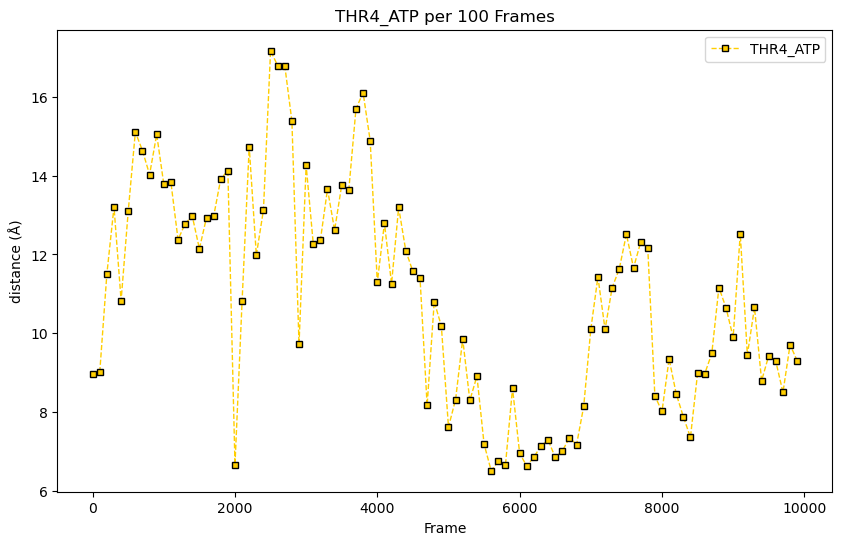

In [11]:
plt.figure(figsize=(10, 6))    # Set the figure size when you initialize the figure
plt.xlabel('Frame')
plt.ylabel('distance (\u212B)')    # Gettin' fancy with unicode characters
plt.title(f'{top[1]} per 100 Frames')
# set colors and linewidths in the plot funtion. separating parameters in lines for readability
plt.plot(
    distances.iloc[::100,0], 
    distances.iloc[::100,1], 
    '--s', 
    color='#FFCE00',
    markersize=4, 
    markeredgecolor='000000',
    markeredgewidth=1,
    linewidth=1, 
    label=top[1]
)
plt.legend()

### Saving the Figure and Setting the Resolution

Set the resolution when you save the image using the syntax 'figure.savefig(filename, dpi)'

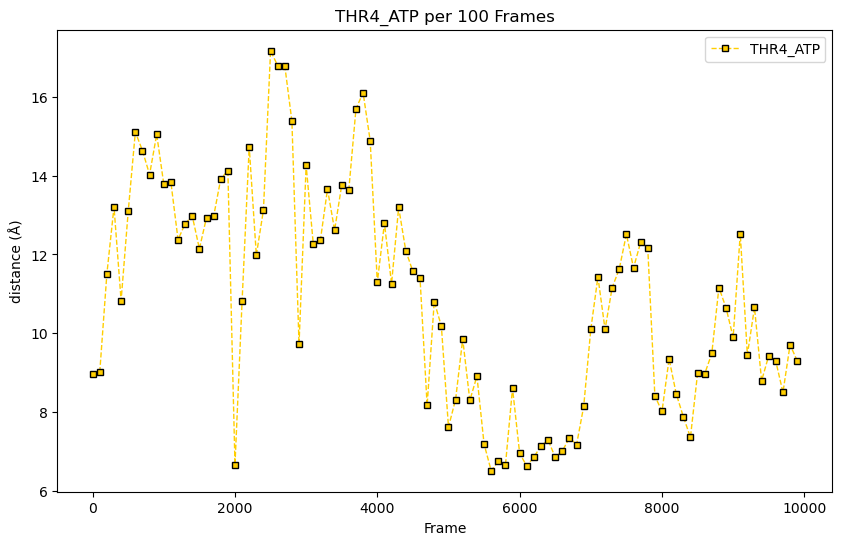

In [12]:
plt.figure(figsize=(10, 6))
plt.xlabel('Frame')
plt.ylabel('distance (\u212B)')
plt.title(f'{top[1]} per 100 Frames')
plt.plot(
    distances.iloc[::100,0], 
    distances.iloc[::100,1], 
    '--s', 
    color='#FFCE00',
    markersize=4, 
    markeredgecolor='000000',
    markeredgewidth=1,
    linewidth=1, 
    label=top[1]
)
plt.legend()
# rename the variable with the figure to something more useful for a file
plt.savefig(f'{top[1]}.png', dpi=300)

## Plotting More Than One Set of Data

### Multiple Sets On a Single Plot

Adding additional data sets to the same plot can be done simpy by using a series of plot commands.

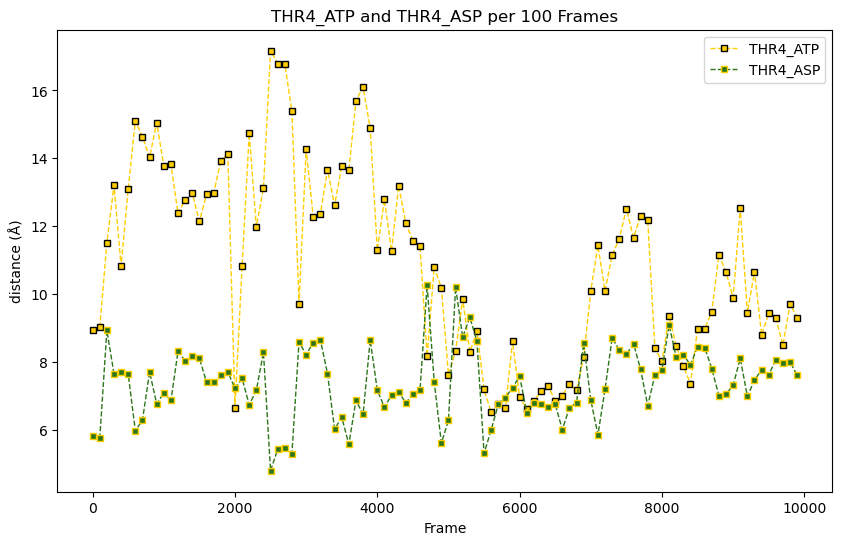

In [13]:
plt.figure(figsize=(10, 6))
plt.xlabel('Frame')
plt.ylabel('distance (\u212B)')
plt.title(f'{top[1]} and {top[2]} per 100 Frames')
plt.plot(
    distances.iloc[::100,0], 
    distances.iloc[::100,1], 
    '--s', 
    color='#FFCE00',
    markersize=4, 
    markeredgecolor='000000',
    markeredgewidth=1,
    linewidth=1, 
    label=top[1]
)
plt.plot(
    distances.iloc[::100,0], 
    distances.iloc[::100,2], 
    '--s', 
    color='#2C7619',
    markersize=4, 
    markeredgecolor='#FFCE00',
    markeredgewidth=1,
    linewidth=1, 
    label=top[2]
)
plt.legend()

Multiple plots can also be added by taking a slice of the data, although this precludes customization.

```{admonition} Challenge Question
:class: exercise

If you made a custom list of colors, can you use a for loop to accomplish the same thing?  How about colors and markers?
```

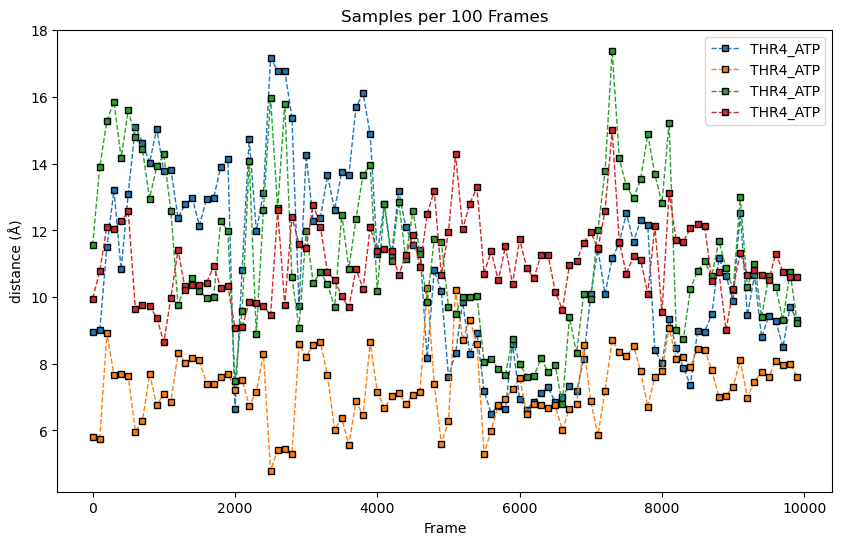

In [14]:
plt.figure(figsize=(10, 6))
plt.xlabel('Frame')
plt.ylabel('distance (\u212B)')
plt.title('Samples per 100 Frames')
plt.plot(
    distances.iloc[::100,0], 
    distances.iloc[::100,1:], 
    '--s', 
    markersize=4, 
    markeredgewidth=1,
    markeredgecolor='#000000',
    linewidth=1, 
    label=top[1]
)
plt.legend()
plt.savefig('all.png', dpi=300)

### Multiple Subplots in One Figure

A figure composed of subplots can be created by setting the boolean parameter 'subplots' to true in the plot command.

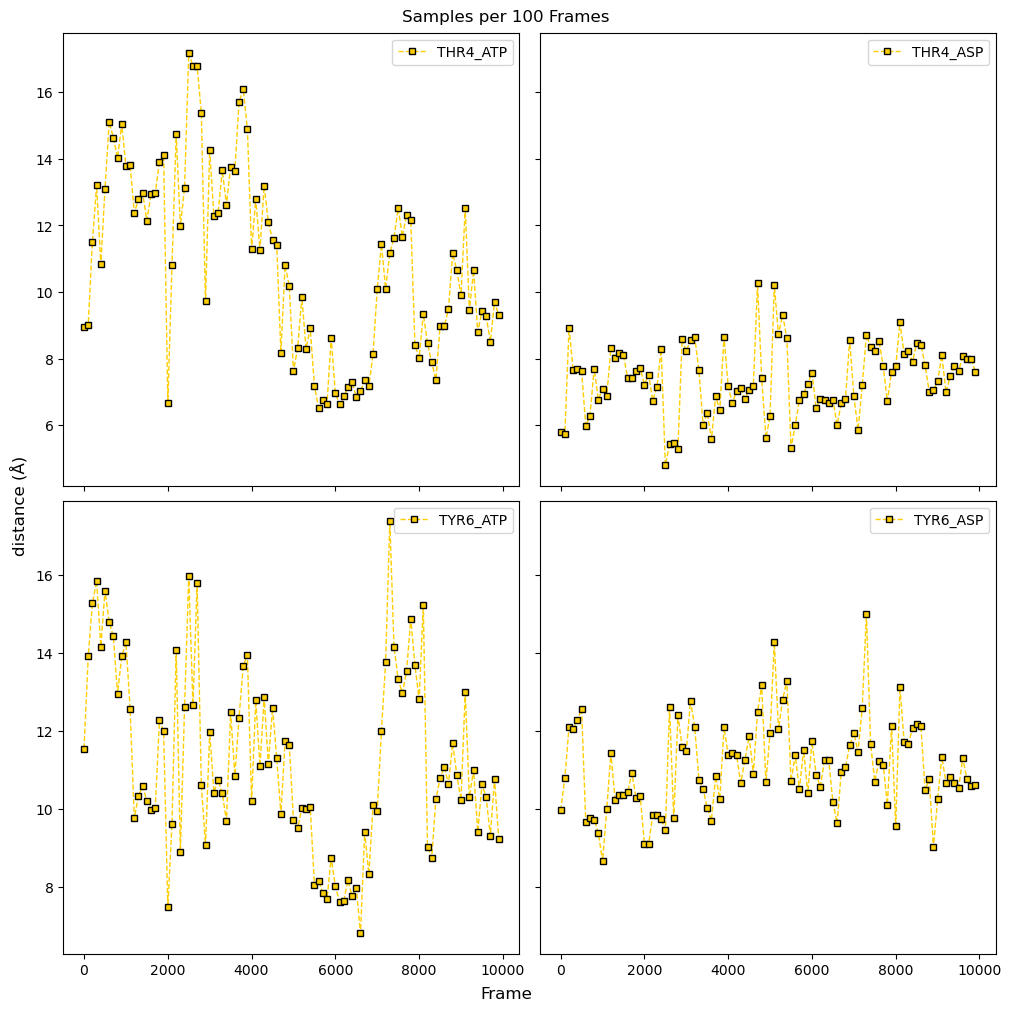

In [15]:
# the subplots command initializes a figure and assigns it subplots.
# this is two variables, a figure object and a list of plot objects, so we need to assign two variables
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex='col', sharey='row', constrained_layout=True)

tracker = 1    # for the iloc command.  could also be used for the challenge question above
for ax, header in zip(axs.flat, top[1:]):
    ax.plot(
        distances.iloc[::100,0], 
        distances.iloc[::100,tracker], 
    '--s', 
    color='#FFCE00',
    markersize=4, 
    markeredgewidth=1,
    markeredgecolor='#000000',
    linewidth=1, 
    label=header,
    )
    ax.legend()
    tracker += 1

# normally the labels are attached to the axes objects, so for a subplot
fig.suptitle('Samples per 100 Frames')
fig.supxlabel('Frame')
fig.supylabel('distance (\u212B)')
plt.savefig('subplot_all.png', dpi=300)

### Multiple Figures Using Loops

Suppose instead in our reporting we wanted to discuss each plot in turn.  As long as the settings are consistent, we can generate, modify, and save a series of figures with a single block of code!

In [16]:
# loop through the list of headers, creating a new figure with each cycle
for i in range(1,len(top)): 
    fname = f"{top[i]}.png"
    plt.figure(figsize=(10, 6))
    plt.xlabel('Frame')
    plt.ylabel('distance (\u212B)')
    plt.title(f'{top[i]} per 100 Frames')
    plt.plot(
        distances.iloc[::100,0], 
        distances.iloc[::100,i], 
        '--s', 
        color='#FFCE00',
        markersize=4, 
        markeredgecolor='000000',
        markeredgewidth=1,
        linewidth=1, 
        label=top[i]
    )
    plt.legend()
    plt.savefig(fname, dpi=300)

#### range(len(list))

There are five headers in our data, so the 'len(top)' function returns 5.  Taking the range of the length however, returns a list object iterating over the indices of the list in the length function.
So:
    len(top) == 5
but
    range(len(top)) == [0,1,2,3,4]
so
    range(1,len(top)) == [1,2,3,4]

``````{admonition} Challenge time!
:class: exercise

In our data reporting, it has been decided that we need to take each of the plots and overlay an average of all the samples for comparison.  We'll need to create a column of the average distances between the 4 existing columns and graph that on top of each sample plot.  This will be too busy though, so we only want to graph one point for every hundred. Don't have a lot of time either, so best use a for loop.

````{admonition} Solution
:class: solution dropdown

```python
# 1 - add the averages column
distances['mean'] = distances.iloc[:,1:4].mean(axis=1)

# 2 - create the figures
for i in range(1,len(top)): 
    fname = f"{top[i]}.png"
    plt.figure(figsize=(10, 6))
    plt.xlabel('Frame')
    plt.ylabel('distance (\u212B)')
    plt.title(f'{top[i]} per 100 Frames')
    plt.plot(
        distances.iloc[::100,0], 
        distances.iloc[::100,i], 
        '-s', 
        color='#FFCE00',
        markersize=4, 
        markeredgecolor='000000',
        markeredgewidth=1,
        linewidth=1, 
        label=top[i]
    )
    plt.plot(
        distances.iloc[::100,0], 
        distances.iloc[::100,5], 
        '--', 
        color='#2C7619',
        linewidth=1, 
        label='mean'
    )
    plt.legend()
    plt.savefig(fname, dpi=300)
```
````
``````

``````{admonition} Key Points
:class: key

* Use pandas to generate figures from tabular data with the 'plot()' function

* Create a variety of chart types with either the 'kind' keyword or the chart method

* Add labels, legends, color, and other stylistic choices to figures by passing parameters to plot

* Work with multiple data sets, either with the 'iloc[]' syntax, 'for' loops, or simple overlay

* Use the matplotlib.pyplot functions 'get_figure()' and 'savefig()' to save the figure to a file

``````